# Question 1

#### The Correlates of War Project was started in 1963 by J. David Singer at the University of Michigan in order to collect data on the history of wars and the conflict among states in the post-napoleonic era.  Academic resources are used to publish datasets as professors and scholars publish datasources to the COW project. Some of the people involved with this project are Jacob Singer, Stuart Bremer, Scott Bennett, Glen Palmer, and Zeev Maoz who all served as directors of the project. Some of the universities involved in the project are the University of Michigan, Penn State, UC Davis, University of Arizona, and Michigan State to name a few. Some of the Datasets that are in this COW Project (As there are 15 total) are Militarized Interstate Disputes (records all instances of when one state threatened, displayed, or used force against another), Formal Alliances (records all formal alliances among states between 1816 and 2012, including mutual defense pacts, non-aggression treaties, and ententes), Direct Contiguity (registers the land and sea borders of all states since the Congress of Vienna, and covers 1816-2016), Diplomatic Exchange (tracks diplomatic representation at the level of chargé d'affaires, minister, and ambassador between states from 1817-2005), and Trade (tracks total national trade and bilateral trade flows between states from 1870-2014).

# Question 2

#### Version 5.0 is not the most recent version of National Material Capabilities dataset, the most recent version of the dataset is version 6.0.  Version 5.0 expanded the data into 2012 from 2007 and also added additional documentation sources.
#### Looking at the Variables we have the following in the dataset:
#### stateabb, this is the three letter country abbreviation, so for example the United States is USA
#### ccode, this is the COW Country Code
#### year, this is the year of observation
#### irst, this is the iron and steel production in the thousands of tons
#### milex, this is the military expenditure, from 1816-1913 in the thousands of british pounds, from 1914+ in the thousands of US Dollars
#### milper, this is the military personel in the thousands
#### energy, this is the energy consumption in thousands of coal-tons equivalent
#### tpop, this is the total population in thousands
#### upop, this is the urban population living in cities larger than 100,000 in the thousands
#### cinc, Composite Index of National Capability score
#### version, this is the verision number of the dataset

#### In the supplementary version of the dataset there are sources and notes on each of the variable being measured and quality of the measurements given. There is also a new variable called pec which is the PEC score for the given country at the given time.
#### The data was collected from academic journals such as the Journal of Peace Research. Causal and Predictive Data are both possible, but Causal is a bit harder to figure out since some of the data is from 1816, which makes it much harder to find accurate data of all measures. Predicitive could be used to figure out certain values given other values are happening.

# Question 3

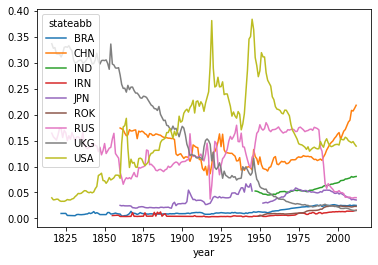

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

###importing the data and separating it out so it only contains 2012 data
df = pd.read_csv('NMC_5_0.csv')
df_2012 = df[df['year']==2012]

###sorting the new dataframe by cinc
df_2012_sorted = df_2012.sort_values(by = ['cinc'])
df_2012_sorted.tail(10)

###After looking at the top ten countries in the dataset we made individual dataframes for each one
df_CHN = df[df['stateabb'] == 'CHN']
df_USA = df[df['stateabb'] == 'USA']
df_IND = df[df['stateabb'] == 'IND']
df_RUS = df[df['stateabb'] == 'RUS']
df_JPN = df[df['stateabb'] == 'JPN']
df_BRA = df[df['stateabb'] == 'BRA']
df_ROK = df[df['stateabb'] == 'ROK']
df_GRM = df[df['stateabb'] == 'GRM']
df_IRN = df[df['stateabb'] == 'IRN']
df_UKG = df[df['stateabb'] == 'UKG']

###Combined the dataframes into a list
frames = [df_CHN, df_USA, df_IND, df_RUS, df_JPN, df_BRA, df_ROK, df_GRM, df_IRN, df_UKG]
state_df = pd.concat(frames)

###Creating a table showin cinc value for each country overtime
state_df.pivot(index="year", columns="stateabb", values="cinc").plot()

plt.show()

#### Looking at this graph the USA did better compared to everyone else between 1900 and 1975, when it was usurped by Russia and then China. USA has sharp increases around 1860, 1920, and 1945. It decreases during the Great Depression and decreases from 1945 onward.

# Question 4

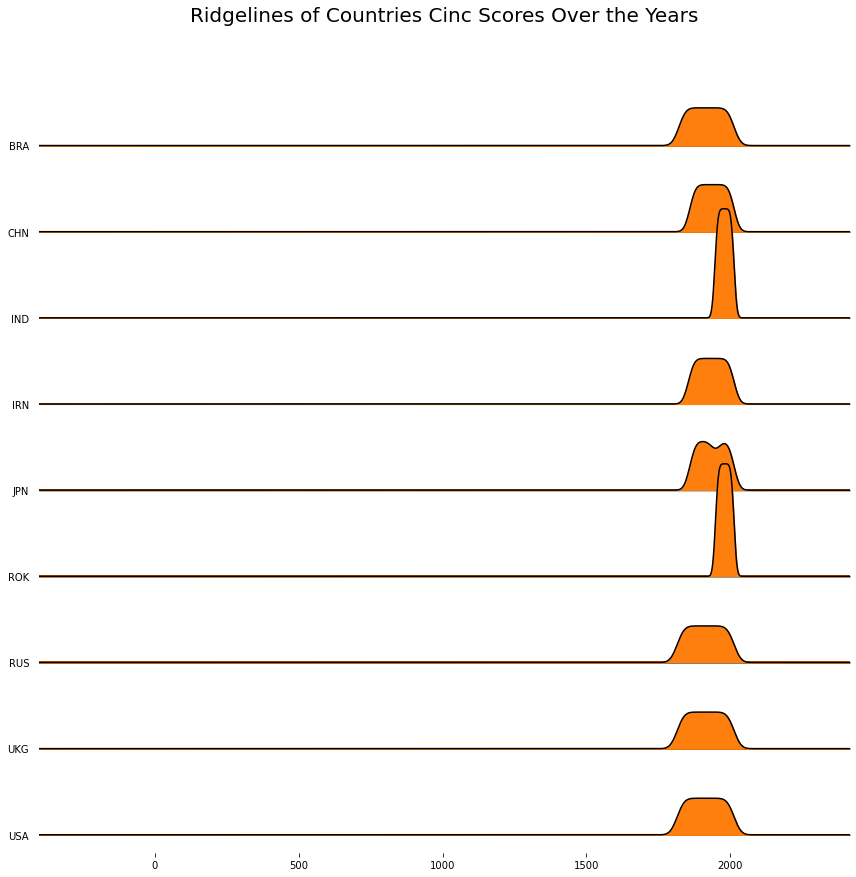

In [2]:
from joypy import joyplot

###used joyplot to create ridgelines of each cinc score over the years.
joyplot(
    data=state_df[['cinc', 'year', 'stateabb']], 
    by='stateabb',
    figsize=(12, 12)
)
plt.title('Ridgelines of Countries Cinc Scores Over the Years', fontsize=20)
plt.show()

#### The countries that are normally distributed are BAR, BHM, CAN, CUB, DMA, JAM, TRI, and USA. The countries that are not normally distributed are DOM and HAI.

# Question 5

In [3]:
##Create a subset with just the listed features
df_2012_subset = df_2012[["milex", "milper", "irst", "pec", "tpop", "upop", "cinc"]]

<AxesSubplot:>

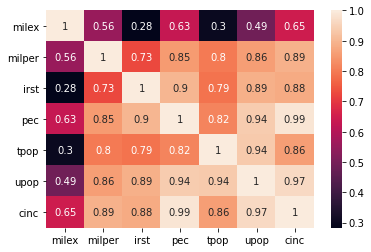

In [4]:
import seaborn as sns

##Actually make the heatmap
sns.heatmap(df_2012_subset.corr(), annot=True)

# Question 6

In [5]:
from sklearn import preprocessing
import numpy as np

##Scale the data between 0 and 1
##Also remove the "stateabb" feature because it is a string and "ccode" displays the same information
df_2012_subset_scaled = preprocessing.minmax_scale(df_2012_subset)
df_2012_subset_scaled

array([[1.00000000e+00, 6.87881430e-01, 1.21327150e-01, ...,
        2.30560871e-01, 4.17286385e-01, 6.38889988e-01],
       [2.81436473e-02, 3.26939843e-02, 1.84764172e-02, ...,
        2.52916550e-02, 4.68979271e-02, 4.19728083e-02],
       [8.39334856e-05, 4.35919791e-03, 0.00000000e+00, ...,
        2.62879841e-04, 0.00000000e+00, 1.13040583e-04],
       ...,
       [1.37323233e-08, 3.92327812e-03, 0.00000000e+00, ...,
        7.98806148e-06, 0.00000000e+00, 1.59089399e-06],
       [1.37323233e-08, 3.92327812e-03, 0.00000000e+00, ...,
        3.58736579e-04, 0.00000000e+00, 5.38978379e-05],
       [1.37323233e-08, 3.92327812e-03, 0.00000000e+00, ...,
        1.29987546e-04, 0.00000000e+00, 2.07045454e-05]])

In [6]:
##Making this a dataframe so that I can read it better
scaled_subset_dataframe = pd.DataFrame(df_2012_subset_scaled, columns = 
                                       ["milex", "milper", "irst", "pec", "tpop", "upop", "cinc"])
scaled_subset_dataframe

,milex,milper,irst,pec,tpop,upop,cinc
0,1.000000e+00,0.687881,0.121327,0.592435,0.230561,0.417286,6.388900e-01
1,2.814365e-02,0.032694,0.018476,0.064314,0.025292,0.046898,4.197281e-02
2,8.393349e-05,0.004359,0.000000,0.000051,0.000263,0.000000,1.130406e-04
3,0.000000e+00,0.025283,0.000379,0.003088,0.008178,0.006658,5.858598e-03
4,0.000000e+00,0.003923,0.000000,0.000917,0.007381,0.005122,2.531475e-03
...,...,...,...,...,...,...,...
190,1.373232e-08,0.003923,0.000000,0.000002,0.000000,0.000000,7.335534e-08
191,1.373232e-08,0.003923,0.000000,0.000004,0.000031,0.000000,5.116535e-06
192,1.373232e-08,0.003923,0.000000,0.000004,0.000008,0.000000,1.590894e-06
193,1.373232e-08,0.003923,0.000000,0.000003,0.000359,0.000000,5.389784e-05


In [7]:
from scipy.spatial import distance

##Dataframe to keep track of euclidean distances
euclidean_dist_df = pd.DataFrame(np.nan, index = range(0, df_2012["cinc"].size), 
                                  columns = range(0, df_2012["cinc"].size))
##Set index and column names to state abbreviations for ease of use
euclidean_dist_df.index = euclidean_dist_df.columns = df_2012["stateabb"]

##Counters. Nothing fancy
i = 0
j = 0

##Iterate through pairs of countries and calculate distance. Then, add them to dataframe. Counters reset as needed
for c in df_2012_subset_scaled:
    for c2 in df_2012_subset_scaled:
        if (distance.euclidean(c, c2) != 0.0):
            euclidean_dist_df.iat[i, j] = distance.euclidean(c, c2)
        j += 1
    j = 0
    i += 1

##Dictionary of minimum values
euclidean_dist_dict = {}
for c in euclidean_dist_df:
    if(not(euclidean_dist_df[c].min() in euclidean_dist_dict)):
        euclidean_dist_dict[c] = euclidean_dist_df[c].min()
##Remove duplicates
temp = []
euclidean_dist_dict_no_dupes = {}
for key, val in euclidean_dist_dict.items():
    if val not in temp:
        temp.append(val)
        euclidean_dist_dict_no_dupes[key] = val
##Convert dictionary to list and then sort it
euclidean_dist_list = sorted(euclidean_dist_dict_no_dupes.items(), key = lambda x:x[1])
euclidean_dist_list[0:10]

[('TUV', 3.820809191230833e-07),
 ('SKN', 2.2438762566501622e-06),
 ('KIR', 3.0013776638230176e-06),
 ('MNC', 3.1273620535521213e-06),
 ('GRN', 3.7921268585288873e-06),
 ('SNM', 4.770612484460835e-06),
 ('SLU', 6.243581795223367e-06),
 ('PAL', 8.304173492666257e-06),
 ('DMA', 1.13276079853209e-05),
 ('SEY', 1.841901735609515e-05)]

In [8]:
##Manually find labels for lowest 10 distances
##1st lowest
euclidean_dist_df.loc[euclidean_dist_df["TUV"] == euclidean_dist_df["TUV"].min()]
##NAU --> TUV

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
NAU,1.571293,0.103431,0.00053,0.024727,0.009379,0.015694,0.002895,0.00798,0.000491,0.000046,...,0.000397,0.000067,3.820809e-07,0.001878,0.00007,NaN,0.000032,0.000008,0.000363,0.000132


In [9]:
##2nd lowest
euclidean_dist_df.loc[euclidean_dist_df["SKN"] == euclidean_dist_df["SKN"].min()]
##MSI --> SKN

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
MSI,1.571286,0.10342,0.000514,0.024715,0.009353,0.015677,0.002872,0.007973,0.000478,0.000014,...,0.000365,0.000035,0.000032,0.001867,0.000038,0.000032,NaN,0.000024,0.000331,0.0001


In [10]:
##3rd lowest
euclidean_dist_df.loc[euclidean_dist_df["KIR"] == euclidean_dist_df["KIR"].min()]
##TON --> KIR

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
TON,1.571279,0.103409,0.000497,0.024702,0.009322,0.015658,0.002845,0.007969,0.000466,0.000024,...,0.000327,0.000003,0.00007,0.001854,NaN,0.00007,0.000038,0.000062,0.000293,0.000062


In [11]:
##4th lowest
euclidean_dist_df.loc[euclidean_dist_df["MNC"] == euclidean_dist_df["MNC"].min()]
##LIE --> MNC

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
LIE,1.571276,0.103405,0.000517,0.024715,0.009358,0.01568,0.002875,0.00795,0.000481,0.000036,...,0.000377,0.000054,0.000036,0.00187,0.000057,0.000035,0.000029,0.00003,0.000343,0.000113


In [12]:
##5th lowest
euclidean_dist_df.loc[euclidean_dist_df["GRN"] == euclidean_dist_df["GRN"].min()]
##SVG --> GRN

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
SVG,1.571277,0.103407,0.000496,0.0247,0.009319,0.015657,0.002842,0.007966,0.000464,0.000027,...,0.000324,0.000007,0.000073,0.001853,0.000004,0.000073,0.000041,0.000065,0.00029,0.000059


In [13]:
##6th lowest
euclidean_dist_df.loc[euclidean_dist_df["SNM"] == euclidean_dist_df["SNM"].min()]
##LIE --> SNM

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
LIE,1.571276,0.103405,0.000517,0.024715,0.009358,0.01568,0.002875,0.00795,0.000481,0.000036,...,0.000377,0.000054,0.000036,0.00187,0.000057,0.000035,0.000029,0.00003,0.000343,0.000113


In [14]:
##7th lowest
euclidean_dist_df.loc[euclidean_dist_df["SLU"] == euclidean_dist_df["SLU"].min()]
##WSM --> SLU

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
WSM,1.571263,0.103387,0.000474,0.024679,0.00927,0.015627,0.0028,0.007954,0.00045,0.000086,...,0.000265,0.000065,0.000132,0.001835,0.000062,0.000132,0.0001,0.000124,0.000231,NaN


In [15]:
##8th lowest
euclidean_dist_df.loc[euclidean_dist_df["PAL"] == euclidean_dist_df["PAL"].min()]
##NAU --> PAL

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
NAU,1.571293,0.103431,0.00053,0.024727,0.009379,0.015694,0.002895,0.00798,0.000491,0.000046,...,0.000397,0.000067,3.820809e-07,0.001878,0.00007,NaN,0.000032,0.000008,0.000363,0.000132


In [16]:
##9th lowest
euclidean_dist_df.loc[euclidean_dist_df["DMA"] == euclidean_dist_df["DMA"].min()]
##AND --> DMA

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
AND,1.571277,0.103407,0.000505,0.024707,0.009336,0.015667,0.002856,0.00796,0.000471,0.000011,...,0.000346,0.000021,0.000052,0.00186,0.000023,0.000052,0.000021,0.000044,0.000313,0.000082


In [17]:
##10th lowest
euclidean_dist_df.loc[euclidean_dist_df["SEY"] == euclidean_dist_df["SEY"].min()]
##GRN --> SEY

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
GRN,1.571276,0.103406,0.000497,0.024701,0.009321,0.015658,0.002844,0.007964,0.000465,0.000025,...,0.000327,0.000006,0.00007,0.001854,0.000005,0.00007,0.000038,0.000062,0.000293,0.000062


In [18]:
##Put it into a dictionary so that it's easier to read
euclidean_dist_final = {"NAU --> TUV":euclidean_dist_df["TUV"].min(), 
                        "MSI --> SKN":euclidean_dist_df["SKN"].min(),
                        "TON --> KIR":euclidean_dist_df["KIR"].min(),
                        "LIE --> MNC":euclidean_dist_df["MNC"].min(),
                        "SVG --> GRN":euclidean_dist_df["GRN"].min(),
                        "LIE --> SNM":euclidean_dist_df["SNM"].min(),
                        "WSM --> SLU":euclidean_dist_df["SLU"].min(),
                        "NAU --> PAL":euclidean_dist_df["PAL"].min(),
                        "AND --> DMA":euclidean_dist_df["DMA"].min(),
                        "GRN --> SEY":euclidean_dist_df["SEY"].min()}
euclidean_dist_final

{'NAU --> TUV': 3.820809191230833e-07,
 'MSI --> SKN': 2.2438762566501622e-06,
 'TON --> KIR': 3.0013776638230176e-06,
 'LIE --> MNC': 3.1273620535521213e-06,
 'SVG --> GRN': 3.7921268585288873e-06,
 'LIE --> SNM': 4.770612484460835e-06,
 'WSM --> SLU': 6.243581795223367e-06,
 'NAU --> PAL': 8.304173492666257e-06,
 'AND --> DMA': 1.13276079853209e-05,
 'GRN --> SEY': 1.841901735609515e-05}

In [19]:
##And now we repeat all that for manhattan (city block) distances
##Dataframe to keep track of manhattan distances
manhattan_dist_df = pd.DataFrame(np.nan, index = range(0, df_2012["cinc"].size), 
                                 columns = range(0, df_2012["cinc"].size))
##Set index and column names to state abbreviations for ease of use
manhattan_dist_df.index = manhattan_dist_df.columns = df_2012["stateabb"]

i = 0
j = 0

for c in df_2012_subset_scaled:
    for c2 in df_2012_subset_scaled:
        if (distance.cityblock(c, c2) != 0.0):
            manhattan_dist_df.iat[i, j] = distance.cityblock(c, c2)
        j += 1
    j = 0
    i += 1
manhattan_dist_df


##Dictionary of minimum values
manhattan_dist_dict = {}
for c in euclidean_dist_df:
    if(not(manhattan_dist_df[c].min() in manhattan_dist_dict)):
        manhattan_dist_dict[c] = manhattan_dist_df[c].min()
##Remove duplicates
temp = []
manhattan_dist_dict_no_dupes = {}
for key, val in manhattan_dist_dict.items():
    if val not in temp:
        temp.append(val)
        manhattan_dist_dict_no_dupes[key] = val
##Convert dictionary to list and then sort it
manhattan_dist_list = sorted(manhattan_dist_dict_no_dupes.items(), key = lambda x:x[1])
manhattan_dist_list[0:10]

[('TUV', 4.4832843818390635e-07),
 ('SKN', 3.2928574131380044e-06),
 ('KIR', 3.9715272519689725e-06),
 ('MNC', 4.230290152338959e-06),
 ('GRN', 5.3879218397238894e-06),
 ('SNM', 6.8541885758175606e-06),
 ('SLU', 8.471961633137991e-06),
 ('PAL', 1.1192979057629223e-05),
 ('DMA', 1.60940133813157e-05),
 ('AND', 1.7094682103163387e-05)]

In [20]:
##Manually find labels for lowest 10 distances
##1st lowest
manhattan_dist_df.loc[manhattan_dist_df["TUV"] == manhattan_dist_df["TUV"].min()]
##NAU --> TUV

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
NAU,3.684456,0.253865,0.000944,0.045518,0.015949,0.031478,0.006112,0.013826,0.000809,0.000054,...,0.000461,0.000076,4.483284e-07,0.002797,0.00008,NaN,0.000038,0.000011,0.000414,0.000157


In [21]:
##2nd lowest
manhattan_dist_df.loc[manhattan_dist_df["SKN"] == manhattan_dist_df["SKN"].min()]
##MSI --> SKN

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
MSI,3.684417,0.253826,0.000906,0.04548,0.015911,0.031439,0.006073,0.013787,0.00077,0.000016,...,0.000423,0.000042,0.000039,0.002758,0.000044,0.000038,NaN,0.000027,0.000377,0.000119


In [22]:
##3rd lowest
manhattan_dist_df.loc[manhattan_dist_df["KIR"] == manhattan_dist_df["KIR"].min()]
##TON --> KIR

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
TON,3.684375,0.253785,0.000864,0.045438,0.015869,0.031398,0.006032,0.013746,0.000729,0.000029,...,0.000381,0.000004,0.000081,0.002716,NaN,0.00008,0.000044,0.000071,0.000334,0.000077


In [23]:
##4th lowest
manhattan_dist_df.loc[manhattan_dist_df["MNC"] == manhattan_dist_df["MNC"].min()]
##LIE --> MNC

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
LIE,3.684399,0.253808,0.000888,0.045462,0.015893,0.031421,0.006055,0.013769,0.000752,0.000053,...,0.000444,0.000076,0.000057,0.00274,0.000079,0.000056,0.000041,0.000045,0.000412,0.000144


In [24]:
##5th lowest
manhattan_dist_df.loc[manhattan_dist_df["GRN"] == manhattan_dist_df["GRN"].min()]
##SVG --> GRN

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
SVG,3.684369,0.253778,0.000858,0.045432,0.015863,0.031391,0.006025,0.013739,0.000722,0.000032,...,0.000375,0.00001,0.000087,0.00271,0.000006,0.000086,0.000048,0.000075,0.000331,0.000071


In [25]:
##6th lowest
manhattan_dist_df.loc[manhattan_dist_df["SNM"] == manhattan_dist_df["SNM"].min()]
##MNC --> SNM

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
MNC,3.684402,0.253811,0.00089,0.045465,0.015896,0.031424,0.006058,0.013772,0.000755,0.000049,...,0.00044,0.000073,0.000054,0.002743,0.000076,0.000054,0.000037,0.000042,0.000408,0.000141


In [26]:
##7th lowest
manhattan_dist_df.loc[manhattan_dist_df["SLU"] == manhattan_dist_df["SLU"].min()]
##WSM --> SLU

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
WSM,3.684298,0.253708,0.000787,0.045361,0.015792,0.03132,0.005955,0.013669,0.000652,0.000103,...,0.000304,0.000081,0.000158,0.002639,0.000077,0.000157,0.000119,0.000146,0.000267,NaN


In [27]:
##8th lowest
manhattan_dist_df.loc[manhattan_dist_df["PAL"] == manhattan_dist_df["PAL"].min()]
##NAU --> PAL

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
NAU,3.684456,0.253865,0.000944,0.045518,0.015949,0.031478,0.006112,0.013826,0.000809,0.000054,...,0.000461,0.000076,4.483284e-07,0.002797,0.00008,NaN,0.000038,0.000011,0.000414,0.000157


In [28]:
##9th lowest
manhattan_dist_df.loc[manhattan_dist_df["DMA"] == manhattan_dist_df["DMA"].min()]
##MSI --> DMA

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
MSI,3.684417,0.253826,0.000906,0.04548,0.015911,0.031439,0.006073,0.013787,0.00077,0.000016,...,0.000423,0.000042,0.000039,0.002758,0.000044,0.000038,NaN,0.000027,0.000377,0.000119


In [29]:
##10th lowest
manhattan_dist_df.loc[manhattan_dist_df["AND"] == manhattan_dist_df["AND"].min()]
##DMA --> AND

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
DMA,3.684401,0.25381,0.00089,0.045464,0.015895,0.031423,0.006057,0.013771,0.000754,NaN,...,0.000407,0.000026,0.000055,0.002742,0.000029,0.000054,0.000016,0.000043,0.000362,0.000103


In [30]:
##Put it into a dictionary so that it's easier to read
manhattan_dist_final = {"NAU --> TUV":euclidean_dist_df["TUV"].min(), 
                        "MSI --> SKN":euclidean_dist_df["SKN"].min(),
                        "TON --> KIR":euclidean_dist_df["KIR"].min(),
                        "LIE --> MNC":euclidean_dist_df["MNC"].min(),
                        "SVG --> GRN":euclidean_dist_df["GRN"].min(),
                        "MNC --> SNM":euclidean_dist_df["SNM"].min(),
                        "WSM --> SLU":euclidean_dist_df["SLU"].min(),
                        "NAU --> PAL":euclidean_dist_df["PAL"].min(),
                        "MSI --> DMA":euclidean_dist_df["DMA"].min(),
                        "DMA --> AND":manhattan_dist_df["AND"].min()}
manhattan_dist_final

{'NAU --> TUV': 3.820809191230833e-07,
 'MSI --> SKN': 2.2438762566501622e-06,
 'TON --> KIR': 3.0013776638230176e-06,
 'LIE --> MNC': 3.1273620535521213e-06,
 'SVG --> GRN': 3.7921268585288873e-06,
 'MNC --> SNM': 4.770612484460835e-06,
 'WSM --> SLU': 6.243581795223367e-06,
 'NAU --> PAL': 8.304173492666257e-06,
 'MSI --> DMA': 1.13276079853209e-05,
 'DMA --> AND': 1.7094682103163387e-05}

# Question 7

In [31]:
##Add "StateNme" to df_2012
country_names = pd.read_csv("COW country codes.csv")
merged = df_2012.merge(country_names, right_on='StateAbb', left_on='stateabb')
merged = merged.drop_duplicates(subset = "stateabb")
merged = merged.drop(["StateAbb", "CCode"], axis = 1)
display(merged)

,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version,StateNme
0,USA,2,2012,655388000,1569,88695,3159873,317505.0,183712.0,1.393526e-01,2011,United States of America
1,CAN,20,2012,18445000,66,13507,343023,34838.0,20647.0,9.155200e-03,2011,Canada
2,BHM,31,2012,55000,1,0,261,372.0,0.0,2.490000e-05,2011,Bahamas
3,CUB,40,2012,-9,49,277,16460,11271.0,2931.0,1.278100e-03,2011,Cuba
5,HAI,41,2012,-9,0,0,4883,10174.0,2255.0,5.524000e-04,2011,Haiti
...,...,...,...,...,...,...,...,...,...,...,...,...
215,NAU,970,2012,0,0,0,3,10.0,0.0,2.600000e-07,2011,Nauru
216,MSI,983,2012,0,0,0,14,53.0,0.0,1.360000e-06,2011,Marshall Islands
217,PAL,986,2012,0,0,0,12,21.0,0.0,5.910000e-07,2011,Palau
218,FSM,987,2012,0,0,0,9,504.0,0.0,1.200000e-05,2011,Federated States of Micronesia


In [32]:
##Update the abbreviations

##Code taken from https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
import pycountry 
def alpha2code(column):
    CODE=[]
    for country in column:
        try:
            code = pycountry.countries.get(name = country).alpha_2
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
merged["stateabb"] = alpha2code(merged["StateNme"])
merged

,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version,StateNme
0,None,2,2012,655388000,1569,88695,3159873,317505.0,183712.0,1.393526e-01,2011,United States of America
1,CA,20,2012,18445000,66,13507,343023,34838.0,20647.0,9.155200e-03,2011,Canada
2,BS,31,2012,55000,1,0,261,372.0,0.0,2.490000e-05,2011,Bahamas
3,CU,40,2012,-9,49,277,16460,11271.0,2931.0,1.278100e-03,2011,Cuba
5,HT,41,2012,-9,0,0,4883,10174.0,2255.0,5.524000e-04,2011,Haiti
...,...,...,...,...,...,...,...,...,...,...,...,...
215,NR,970,2012,0,0,0,3,10.0,0.0,2.600000e-07,2011,Nauru
216,MH,983,2012,0,0,0,14,53.0,0.0,1.360000e-06,2011,Marshall Islands
217,PW,986,2012,0,0,0,12,21.0,0.0,5.910000e-07,2011,Palau
218,None,987,2012,0,0,0,9,504.0,0.0,1.200000e-05,2011,Federated States of Micronesia


In [33]:
##Fill in the blanks manually
merged.loc[merged["stateabb"] == "None"]

,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version,StateNme
0,None,2,2012,655388000,1569,88695,3159873,317505.0,183712.0,0.139353,2011,United States of America
14,None,56,2012,0,0,0,50,181.0,0.0,0.000005,2011,St. Lucia
15,None,57,2012,0,0,0,20,109.0,0.0,0.000003,2011,St. Vincent and the Grenadines
16,None,58,2012,28000,0,0,40,89.0,0.0,0.000005,2011,Antigua & Barbuda
17,None,60,2012,0,0,0,25,54.0,0.0,0.000001,2011,St. Kitts and Nevis
27,None,101,2012,6966000,115,2359,149007,29955.0,13651.0,0.004927,2011,Venezuela
33,None,145,2012,336000,46,0,10900,10496.0,5032.0,0.001153,2011,Bolivia
62,None,316,2012,2120000,25,5072,54943,10660.0,1669.0,0.001795,2011,Czech Republic
70,None,343,2012,129000,8,217,4842,2106.0,495.0,0.000231,2011,Macedonia
72,None,345,2012,841000,29,346,21422,9553.0,1171.0,0.000855,2011,Yugoslavia


In [34]:
merged.loc[merged["StateNme"] == "United States of America", "stateabb"] = "US"
merged.loc[merged["StateNme"] == "St. Lucia", "stateabb"] = "LC"
merged.loc[merged["StateNme"] == "St. Vincent and the Grenadines", "stateabb"] = "VC"
merged.loc[merged["StateNme"] == "Antigua & Barbuda", "stateabb"] = "AG"
merged.loc[merged["StateNme"] == "St. Kitts and Nevis", "stateabb"] = "KN"

merged.loc[merged["StateNme"] == "Venezuela", "stateabb"] = "VE"
merged.loc[merged["StateNme"] == "Bolivia", "stateabb"] = "BO"
merged.loc[merged["StateNme"] == "Czech Republic", "stateabb"] = "CZ"
merged.loc[merged["StateNme"] == "Macedonia", "stateabb"] = "MK"
merged.loc[merged["StateNme"] == "Yugoslavia", "stateabb"] = "YU"

merged.loc[merged["StateNme"] == "Kosovo", "stateabb"] = "XK"
merged.loc[merged["StateNme"] == "Moldova", "stateabb"] = "MD"
merged.loc[merged["StateNme"] == "Russia", "stateabb"] = "RU"
merged.loc[merged["StateNme"] == "Cape Verde", "stateabb"] = "CV"
merged.loc[merged["StateNme"] == "Ivory Coast", "stateabb"] = "CI"

merged.loc[merged["StateNme"] == "Democratic Republic of the Congo", "stateabb"] = "CD"
merged.loc[merged["StateNme"] == "Tanzania", "stateabb"] = "TZ"
merged.loc[merged["StateNme"] == "Swaziland", "stateabb"] = "SZ"
merged.loc[merged["StateNme"] == "Iran", "stateabb"] = "IR"
merged.loc[merged["StateNme"] == "Syria", "stateabb"] = "SY"

merged.loc[merged["StateNme"] == "Taiwan", "stateabb"] = "TW"
merged.loc[merged["StateNme"] == "North Korea", "stateabb"] = "KP"
merged.loc[merged["StateNme"] == "South Korea", "stateabb"] = "KR"
merged.loc[merged["StateNme"] == "Laos", "stateabb"] = "LA"
merged.loc[merged["StateNme"] == "Vietnam", "stateabb"] = "VN"

merged.loc[merged["StateNme"] == "Brunei", "stateabb"] = "BN"
merged.loc[merged["StateNme"] == "East Timor", "stateabb"] = "TL"
merged.loc[merged["StateNme"] == "Federated States of Micronesia", "stateabb"] = "FM"

In [38]:
##Actually make the map
import pygal
worldmap =  pygal.maps.world.World()
worldmap.title = "National Capability of Countries"

##Dictionary of state abbreviations and cinc values
merged_dict = {}

for c in merged.index:
    merged_dict[merged.loc[c, "stateabb"]] = merged.loc[c, "cinc"]
merged_dict

worldmap.add('CINC Value', {
        'aq' : 10,
        'cd' : 30,
        'de' : 40,
        'eg' : 50,
        'ga' : 45,
        'hk' : 23,
        'in' : 70,
        'jp' : 54,
        'nz' : 41,
        'kz' : 32,
        'us' : 66
})

worldmap.render_to_file('world_map.svg')

In [36]:
merged_dict

{'US': 0.1393526,
 'CA': 0.0091552,
 'BS': 2.49e-05,
 'CU': 0.0012781,
 'HT': 0.0005524,
 'DO': 0.00081,
 'JM': 0.0001719,
 'TT': 0.0004905,
 'BB': 1.99e-05,
 'DM': 1.82e-06,
 'GD': 2.74e-06,
 'LC': 4.67e-06,
 'VC': 2.73e-06,
 'AG': 5.39e-06,
 'KN': 1.47e-06,
 'MX': 0.0150392,
 'BZ': 1.96e-05,
 'GT': 0.0008498,
 'HN': 0.0005081,
 'SV': 0.0004124,
 'NI': 0.0003474,
 'CR': 0.0002579,
 'PA': 0.0002897,
 'CO': 0.0066779,
 'VE': 0.0049272,
 'GY': 3.36e-05,
 'SR': 4.9e-05,
 'EC': 0.0015635,
 'PE': 0.0033976,
 'BR': 0.0250626,
 'BO': 0.001153,
 'PY': 0.0005314,
 'CL': 0.0027141,
 'AR': 0.0056534,
 'UY': 0.0005186,
 'GB': 0.015277,
 'IE': 0.0005377,
 'NL': 0.0041365,
 'BE': 0.0029283,
 'LU': 0.0003069,
 'FR': 0.0142069,
 'MC': 1.99e-06,
 'LI': 2.1e-06,
 'CH': 0.0014276,
 'ES': 0.0081208,
 'AD': 2.39e-06,
 'PT': 0.0017053,
 'DE': 0.0179105,
 'PL': 0.005493,
 'AT': 0.0020231,
 'HU': 0.0011434,
 'CZ': 0.0017953,
 'SK': 0.0010607,
 'IT': 0.0128479,
 'SM': 1.89e-06,
 'MT': 3.41e-05,
 'AL': 0.000309